In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
##1
df = pd.read_csv('datasets_4909_7459_USA_Housing.csv')
df

In [ ]:
##2
df.head(10)

In [ ]:
##2
df.tail(10)

In [ ]:
##2
df.sample(10)

In [ ]:
##3
df.info()

In [ ]:
##4
df.info()

In [ ]:
df.describe()

In [ ]:
##5
sns.pairplot(df)

In [ ]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [ ]:
##6
sns.distplot(df['Price'])

In [ ]:
sns.distplot(df['Area Population'])

In [ ]:
sns.distplot(df['Avg. Area Income'])

In [ ]:
sns.distplot(df['Avg. Area House Age'])

In [ ]:
sns.distplot(df['Avg. Area Number of Bedrooms'])

In [ ]:
sns.distplot(df['Avg. Area Number of Rooms'])

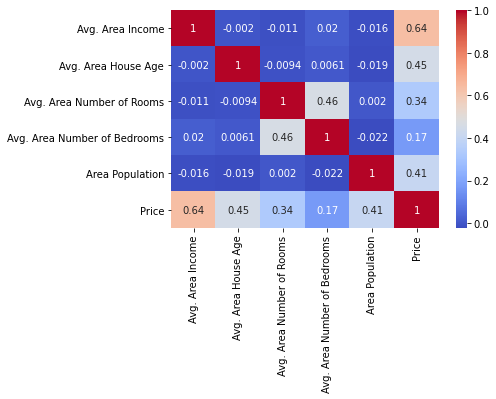

In [ ]:
##7
sns.heatmap(df.corr(), cmap= 'coolwarm', annot= True)

In [ ]:
##8
sns.scatterplot(df['Avg. Area Income'], df['Price'])

In [ ]:
##9
sns.scatterplot(df['Avg. Area Number of Bedrooms'], df['Area Population'])

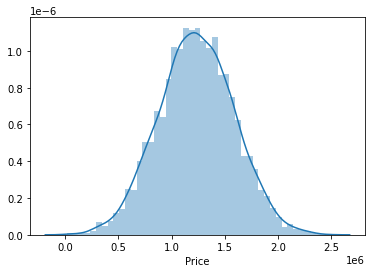

In [ ]:
##10
sns.distplot(df['Price'])

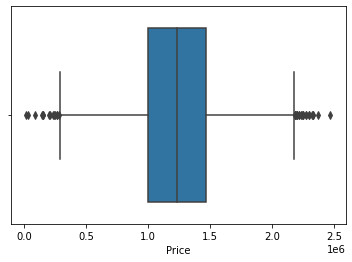

In [ ]:
##11
sns.boxplot(df['Price'])

In [ ]:
import sklearn

In [ ]:
x = df.drop(columns=['Avg. Area Number of Bedrooms', 'Price', 'Address'])
y = df['Price']

In [ ]:
##12
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_trainA, x_testA, y_trainA, y_testA = train_test_split(x, y, test_size = 0.2)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
##13
model.fit(x_train[['Avg. Area Income']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(x_train[['Avg. Area Income']], y_train)

0.41777762775471394

In [ ]:
pred = model.predict(x_test[['Avg. Area Income']])
pred

array([1146215.03930977, 1084784.53963178, 1258343.44211734, ...,
        965963.4908768 ,  970901.95641775, 1139516.66760256])

In [ ]:
from sklearn import metrics

In [ ]:
##14
print('MAE :', metrics.mean_absolute_error(y_test, pred))
print('MSE :', metrics.mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 219609.42271731884
MSE : 75064666010.96059
RMSE : 273979.31675759866


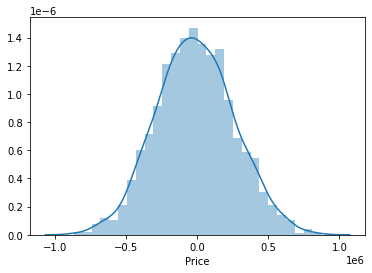

In [ ]:
##15
sns.distplot(y_test-pred)

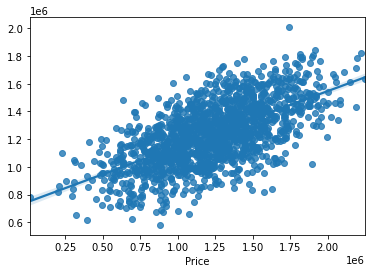

In [ ]:
##16
sns.regplot(y_test, pred)

In [ ]:
##17
md = LinearRegression()

In [ ]:
md.fit(x_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
md.score(x_test, y_test)

0.9175228929142077

In [ ]:
md.intercept_

-2658676.697821842

In [ ]:
coeff_df = pd.DataFrame(md.coef_, x.columns, columns=['Coef_'])
coeff_df

,Coef_
Avg. Area Income,21.772470
Avg. Area House Age,166245.227771
Avg. Area Number of Rooms,122580.595053
Area Population,15.100039


In [ ]:
predictions = md.predict(x_test)
predictions

array([1114127.42514176, 1052985.42746508,  963226.91764216, ...,
        663173.79795219, 1200383.08187064, 1310849.61910883])

In [ ]:
##18
print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 80541.48968964798
MSE : 10109070882.902557
RMSE : 100543.87541219285


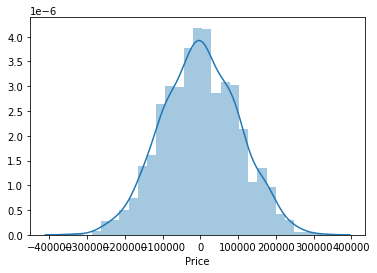

In [ ]:
##19
sns.distplot(y_test - predictions)

In [ ]:
##20
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, pred)) - np.sqrt(metrics.mean_squared_error(y_test, predictions)))


RMSE : 173435.44134540582


273979.31675759866